In [1]:
from itertools import count
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from lab_lib import *

In [2]:
def pref_sum(arr):
    res = []
    pre = (0, 0)
    for i in arr:
        pre = (pre[0] + i[0], np.sqrt(pre[1]**2 + i[1]**2))
        res.append(pre)

    return res

def count_I(N, t, background_I=(0,0)):
    I_ = countWithSigma(N[0] / t, [N])
    return (np.abs(I_[0] - background_I[0]), np.sqrt(I_[1]**2 + background_I[1]**2))

In [3]:
"""
Table
"""

# MeV
E_photon = [  0.4,   0.5,   0.6,   0.7,   0.8,   0.9,   1.0,   1.1]
# 1/cm
Al_mu =    [0.250, 0.228, 0.210, 0.196, 0.184, 0.175, 0.166, 0.158]
Fe_mu =    [0.740, 0.662, 0.606, 0.563, 0.528, 0.498, 0.472, 0.450]
Pb_mu =    [ 2.63,  1.83,  1.42,  1.17,  1.01, 0.891, 0.806, 0.740]

In [4]:
def make_plot(material, Len, N, t, back_I, unhind_I):
    assert len(Len) == len(N)
    assert len(N) == len(t)

    sum_len = pref_sum(Len)

    I = [count_I(N[i], t[i], back_I) for i in range(len(Len))]

    x  = [i[0]/10 for i in sum_len]
    dx = [i[1]/10 for i in sum_len]
    y  = [np.log(unhind_I[0] / i[0]) for i in I]
    dy = [np.sqrt((unhind_I[1]/unhind_I[0])**2 + (i[1]/i[0])**2) for i in I]

    mu = make_mnk_direct_prop(f"img/{material}.png", "", r"$\ell, мм$", r"$ln\frac{I_0 - I_{фон}}{I - I_{фон}}$", x, y, dx, dy)

    return I, mu

$N_{фон} = $ $6000 \pm 1000$
$t_{фон} = $ $180$ $с$
$I_{фон} = $ $33 \pm 6$ $с^-1$
$N_0 = $ $120800 \pm 1000$
$t_0 = $ $10$ $с$
$I_0 = $ $12050 \pm 100$ $с^-1$
k: (0.19273562163913482 +- 0.0009867113307605359)


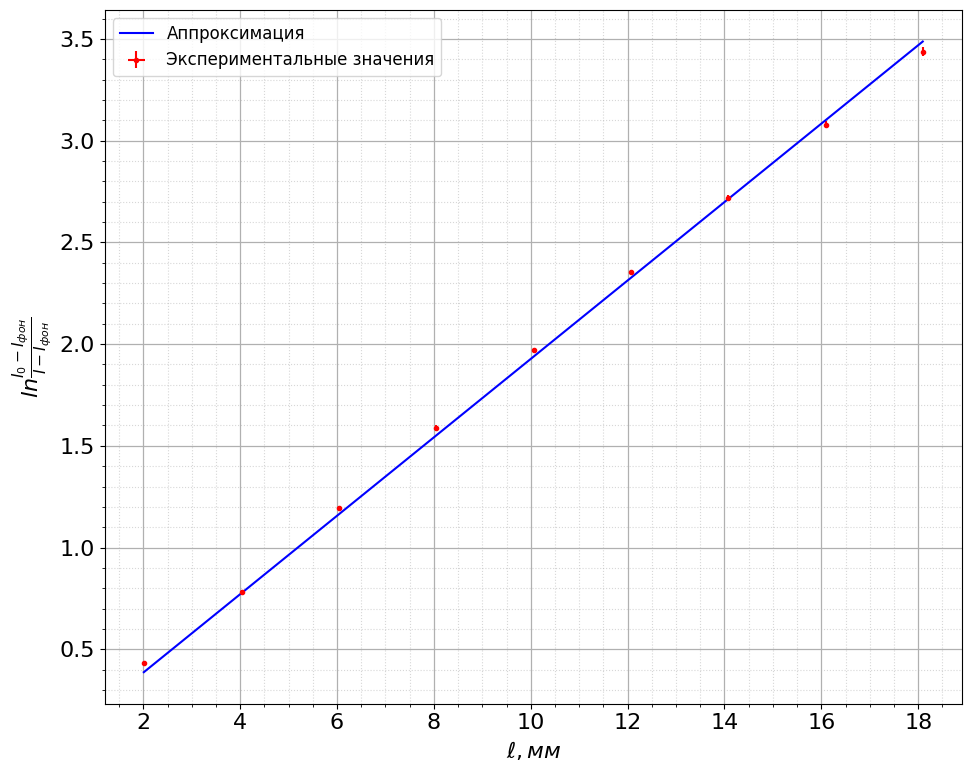

k: (1.0707694962373178 +- 0.008341337233923213)


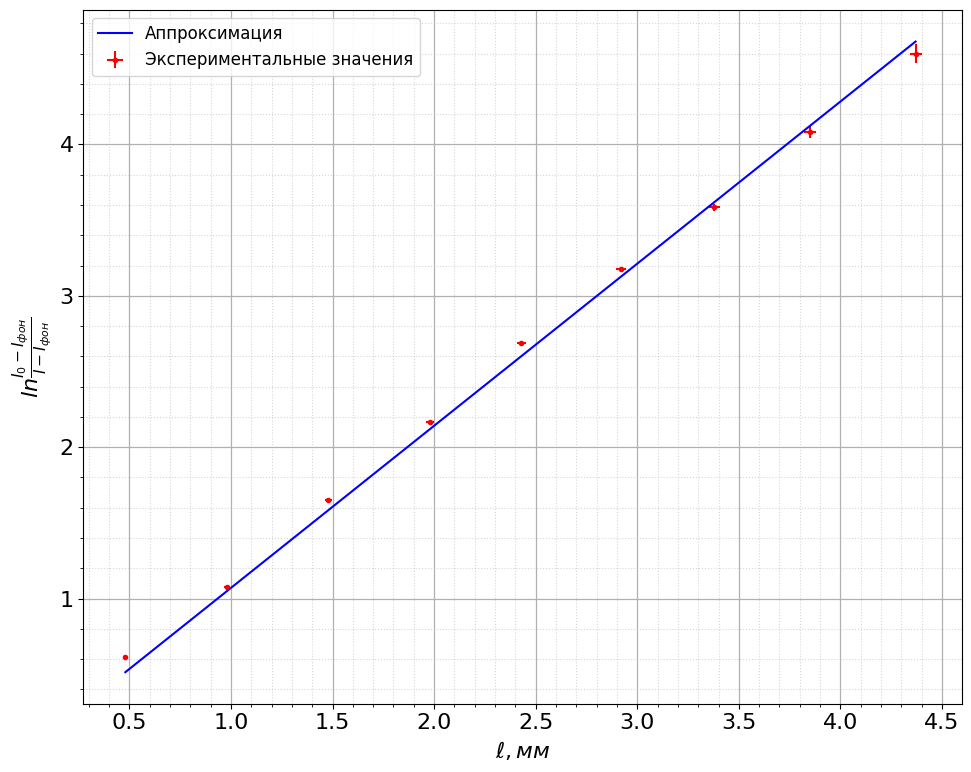

k: (0.5238795439137018 +- 0.003423025718623272)


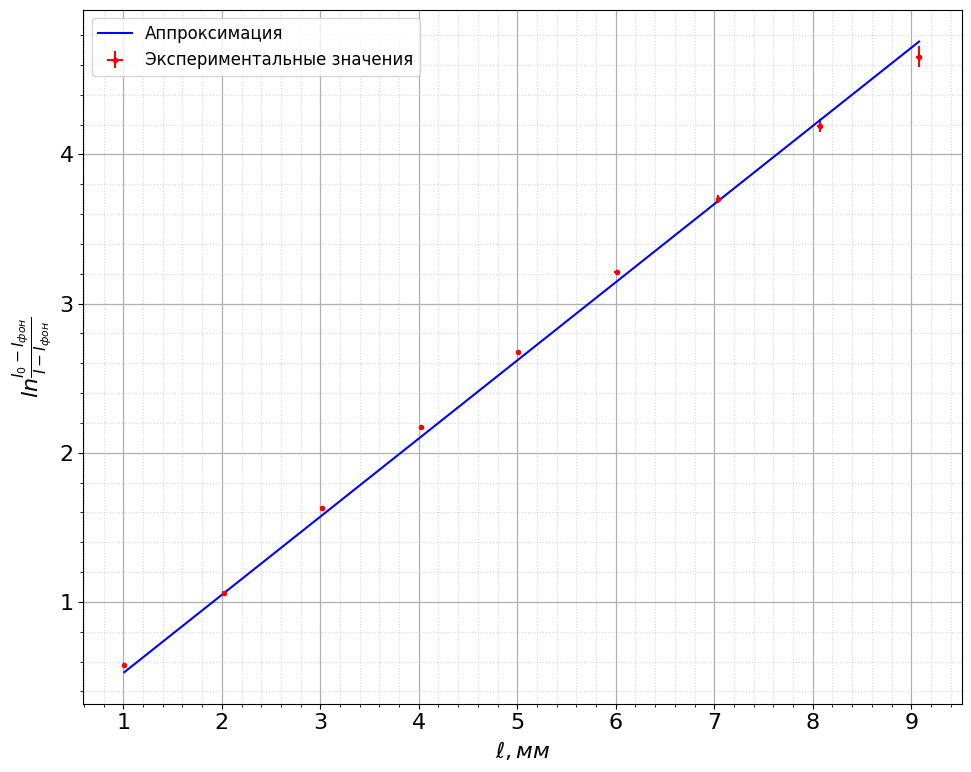

In [5]:
"""
3.
"""

N_sigma_ = 1000

background_N = (4055 + 1966, N_sigma_)
backgorund_t = 120 + 60
background_I = count_I(background_N, backgorund_t)

unhindered_N = (120812, N_sigma_)
unhindered_t = 10
unhindered_I = count_I(unhindered_N, unhindered_t, background_I)

print("$N_{фон} = $", texAns(background_N))
print("$t_{фон} = $", texAns((backgorund_t,)), r"$с$")
print("$I_{фон} = $", texAns(background_I), r"$с^-1$")
print("$N_0 = $", texAns(unhindered_N))
print("$t_0 = $", texAns((unhindered_t,)), r"$с$")
print("$I_0 = $", texAns(unhindered_I), r"$с^-1$")

"""
Al
"""

# mm
Al_len_ = [20.10, 20.22, 20.00, 20.12, 20.30, 20.00, 20.00, 20.20, 20.00]
Al_len_sigma_ = 0.02

Al_len = [(i, Al_len_sigma_) for i in Al_len_]
Al_sum_len = pref_sum(Al_len)

Al_N_ = [157283, 221690, 147556, 99655, 102901, 94134 + 11972, 99294, 70427 + 35361, 50433 + 25391]
Al_t  = [20,         40,     40,    40,     60,       80 + 10,   120,      120 + 60,      120 + 60]

Al_N = [(i, N_sigma_) for i in Al_N_]

Al_I, Al_mu_experiment = make_plot("Al", Al_len, Al_N, Al_t, background_I, unhindered_I)

"""
Pb
"""

# mm
Pb_len_ = [4.8, 5.0, 5.0, 5.0, 4.5, 4.9, 4.6, 4.7, 5.2]
PB_len_sigma_ = 0.1

Pb_len = [(i, PB_len_sigma_) for i in Pb_len_]
Pb_sum_len = pref_sum(Pb_len)

Pb_N_ = [65418 + 65414, 123984, 140710, 126916, 102195, 64302 + 32301, 44206 + 22065, 28485 + 14174, 18315 + 9502]
Pb_t  = [      10 + 10,     30,     60,     90,    120,      120 + 60,      120 + 60,      120 + 60,     120 + 60]

Pb_N = [(i, N_sigma_) for i in Pb_N_]

Pb_I, Pb_mu_experiment = make_plot("Pb", Pb_len, Pb_N, Pb_t, background_I, unhindered_I)

"""
Fe
"""

# mm
Fe_len_ = [10.1, 10.1, 10.0, 10.0, 9.9, 10.0, 10.3, 10.3, 10.1]
Fe_len_sigma_ = 0.1

Fe_len = [(i, Fe_len_sigma_) for i in Fe_len_]
Fe_sum_len = pref_sum(Fe_len)

Fe_N_ = [135773, 126070, 96125 + 11897, 84167 + 27952, 103597, 62158 + 31482, 39583 + 19895, 25757 + 13012, 17717 + 8909]
Fe_t  = [20,         30,        40 + 5,       60 + 20,    120,      120 + 60,      120 + 60,      120 + 60,     120 + 60]

Fe_N = [(i, N_sigma_) for i in Fe_N_]

Fe_I, Fe_mu_experiment = make_plot("Fe", Fe_len, Fe_N, Fe_t, background_I, unhindered_I)

$E_{Al}$ $0.7 \pm 0.2$
$E_{Fe}$ $0.81 \pm 0.11$
$E_{Pb}$ $0.76 \pm 0.04$


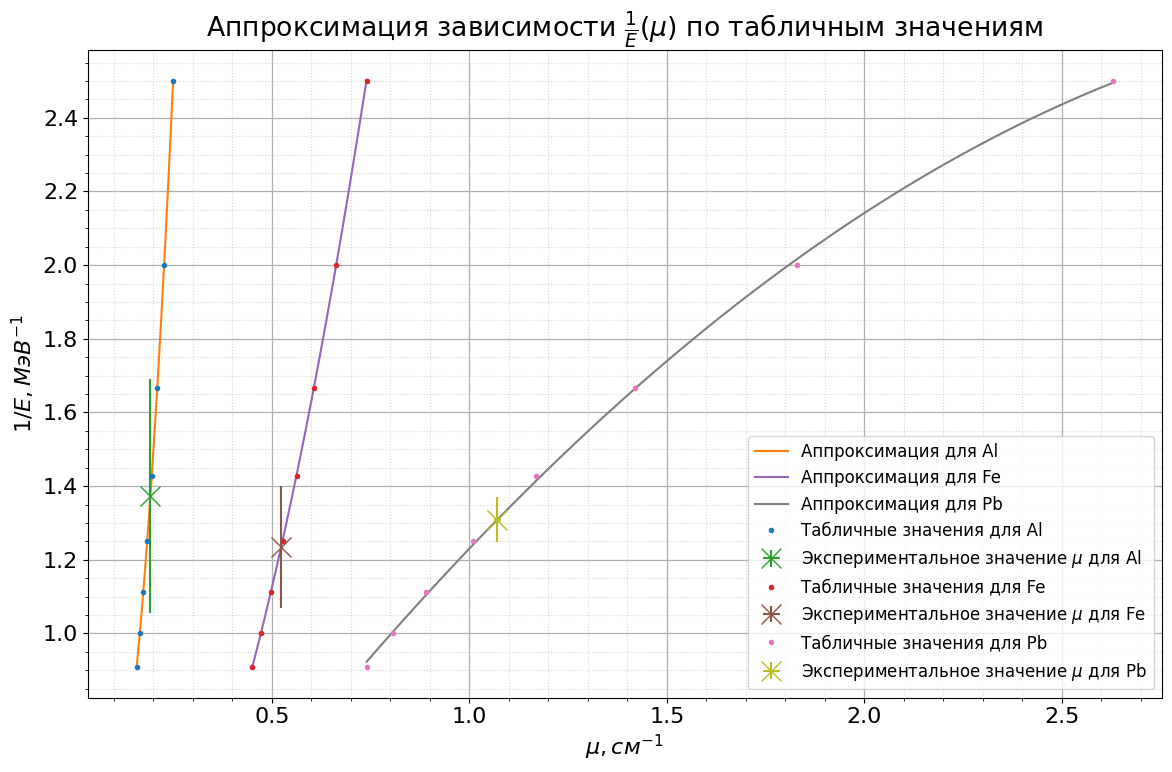



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline

         & Pb & Fe & Al\\ \hline
        a & $68 \pm 3$ & $4.8 \pm 0.2$ & $-0.21 \pm 0.01$\\ \hline
        b & $-10 \pm 1$ & $-0.3 \pm 0.3$ & $1.55 \pm 0.05$\\ \hline
        c & $0.9 \pm 0.1$ & $0.04 \pm 0.07$ & $-0.11 \pm 0.03$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



In [6]:
def func(x, a, b, c):
    return a*x**2 + b*x + c

def func_inacc(x, dx, a, b, c, da, db, dc):
    inacc_ = [(2*a*x + b)*dx, da*x**2, db*x, dc]
    return np.sqrt(sum([i**2 for i in inacc_]))

mpl.rcParams['font.size'] = 16
plt.figure(figsize = (12,8), facecolor = "white")
plt.title(r"Аппроксимация зависимости $\frac{1}{E}(\mu)$ по табличным значениям")
plt.ylabel(r"$1/E, МэВ^{-1}$")
plt.xlabel(r"$\mu, см^{-1}$")

mus = [Pb_mu, Fe_mu, Al_mu]
mus_experiment = [Pb_mu_experiment, Fe_mu_experiment, Al_mu_experiment]
materials = ["Pb", "Fe", "Al"]
Es = []

funcs = [func]*3
funcs_inacc = [func_inacc]*3

coefficients = []

for i in range(len(mus)-1, -1, -1):
    mu = [i for i in mus[i]]
    mu_exp = mus_experiment[i]

    popt, pcov = curve_fit(funcs[i], mu, [1/j for j in E_photon])
    coeffs  = popt
    dcoeffs = np.sqrt(np.diag(pcov))

    coefficients.append([(coeffs[i], dcoeffs[i]) for i in range(len(coeffs))])

    plt.errorbar(mu, [1/j for j in E_photon], fmt='.', label = 'Табличные значения для ' + materials[i])

    x_lin = np.linspace(min(mu), max(mu), 1000)
    plt.plot(x_lin, [funcs[i](x, *coeffs) for x in x_lin], label = "Аппроксимация для " + materials[i])

    E_ = funcs[i](mu_exp[0], *coeffs)
    E_sigma_ = funcs_inacc[i](mu_exp[0], mu_exp[1], *coeffs, *dcoeffs)
    E = (1/E_, E_sigma_/E_**2)

    plt.errorbar(y=E_, x=mu_exp[0], yerr=E_sigma_, xerr=mu_exp[1], fmt='x', markersize=15, label = r'Экспериментальное значение $\mu$ для ' + materials[i])

    print("$E_{" + materials[i] + "}$", texAns(E))
    Es.append(E)

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc = "lower right", fontsize = 12) # Активируем легенду графика

plt.savefig("img/attenuation_factor_plot.png")
plt.show()

coeffs_names = "abcdefghijkl"
coeffs_table = [[""] + materials]
for i in range(len(coefficients[0])):
    coeffs_table.append([coeffs_names[i]] + [texAns(j[i]) for j in coefficients])

texTable(coeffs_table)

In [7]:
E_mean = meanWithInacc(Es)
print("$<E> = $", texAns(E_mean))

$<E> = $ $0.77 \pm 0.11$


In [8]:
rhos = [11.35, 7.87, 2.70]
mu_m1 = [countWithSigma(mus_experiment[i][0]/rhos[i], [mus_experiment[i]]) for i in range(len(rhos))]

for i in range(len(materials)):
    print(materials[i] + r": $\mu' = $", texAns(mu_m1[i]))

Pb: $\mu' = $ $0.0943 \pm 0.0007$
Fe: $\mu' = $ $0.0666 \pm 0.0004$
Al: $\mu' = $ $0.0714 \pm 0.0004$


In [9]:
mu_table = [[""] + materials,
            [r"$\mu,~см^{-1}$"] + [texAns(i) for i in mus_experiment]]

texTable(mu_table)

E_table = [[""] + materials + ["Среднее"],
           [r"$E,~МэВ$"] + [texAns(i) for i in Es] + [texAns(E_mean)]]

texTable(E_table)

mu_m1_table = [[""] + materials,
               [r"$\rho,~г/см^3$"] + [texAns((i,)) for i in rhos],
               [r"$\mu'*10^{-3},~см^2/г"] + [texAns(tuple(j*1e3 for j in i)) for i in mu_m1]]

texTable(mu_m1_table)

res_table = [[""] + materials,
             mu_table[1],
             mu_m1_table[2],
             E_table[1]]

texTable(res_table)

lens = [Pb_len, Fe_len, Al_len]
sum_lens = [Pb_sum_len, Fe_sum_len, Al_sum_len]

len_table = [[r"$\ell, мм$", r"$\sum \ell, мм$"]*len(materials)]
for i in range(len(lens[0])):
    arr = []
    for j in range(len(materials)):
        arr.append(texAns(lens[j][i]))
        arr.append(texAns(sum_lens[j][i]))
    len_table.append(arr)

texTable(len_table)

Ns = [Pb_N, Fe_N, Al_N]
ts = [Pb_t, Fe_t, Al_t]
measure_table = [[r"$N*10^3$", r"$t, с$", r"$\sum \ell, мм$"]*len(materials)]
for i in range(len(lens[0])):
    arr = []
    for j in range(len(materials)):
        arr.append(texAns(tuple(n/1000 for n in Ns[j][i])))
        arr.append(texAns((ts[j][i],)))
        arr.append(texAns(sum_lens[j][i]))
    measure_table.append(arr)

texTable(measure_table)

E_lab_table = [[r"$E_{фотон}, МэВ$", r"$\mu, см^{-1}$"],
               materials]
for i in range(len(E_photon)):
    arr = []
    arr.append(texAns((E_photon[i],)))
    arr.append(texAns((Pb_mu[i],)))
    arr.append(texAns((Fe_mu[i],)))
    arr.append(texAns((Al_mu[i],)))
    E_lab_table.append(arr)

texTable(E_lab_table)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline

         & Pb & Fe & Al\\ \hline
        $\mu,~см^{-1}$ & $1.071 \pm 0.008$ & $0.524 \pm 0.003$ & $0.19274 \pm 0.00099$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|c|}
        \hline

         & Pb & Fe & Al & Среднее\\ \hline
        $E,~МэВ$ & $0.7 \pm 0.2$ & $0.81 \pm 0.11$ & $0.76 \pm 0.04$ & $0.77 \pm 0.11$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline

         & Pb & Fe & Al\\ \hline
        $\rho,~г/см^3$ & $11.35$ & $7.87$ & $2.7$\\ \hline
        $\mu'*10^{-3},~см^2/г & $94.3 \pm 0.7$ & $66.6 \pm 0.4$ & $71.4 \pm 0.4$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline

         & Pb & Fe & Al\\ \hline
   